In [1]:
%matplotlib inline 
#to include graphs next to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='combined_csv_3dim.csv'
data3 = pd.read_csv(file)


#get the overview of the data


print(data3.describe()) #statistics 

       totalTravelTimeInSec  ...  totalWaitingTime
count          92229.000000  ...      92229.000000
mean          197502.622841  ...     186403.156328
std           382265.843976  ...     387461.940713
min              424.000000  ...          0.000000
25%             9891.000000  ...          0.000000
50%            16091.000000  ...          0.000000
75%            30249.000000  ...       6948.000000
max           999999.000000  ...     999999.000000

[8 rows x 5 columns]


In [2]:
#investigate deeper the rows with the values of 999999
data3[(data3 == 999999.0).any(axis=1)]
# we have 17048 rows with the unreal values 


,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
12,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
22,999999.0,999999.0,999999,999999.0,999999,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
37,999999.0,999999.0,999999,999999.0,999999,numberofChanges,noFlights,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
41,999999.0,999999.0,999999,999999.0,999999,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],Hamburg,Würzburg
51,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92218,999999.0,999999.0,999999,999999.0,999999,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92223,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92226,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92227,999999.0,999999.0,999999,999999.0,999999,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],Würzburg,Oberhausen


In [3]:
for c in data3:
    print(data3[c].unique())
    print(data3[c].nunique())

[14400. 18300. 21643. ... 16522. 22080. 27198.]
2676
[159.5729972  106.66969339  26.         ...  85.79963198 108.44789322
 109.45803673]
3654
[     0 999999      1      2      3      4      7      5]
8
[0.00000000e+00 9.99999000e+05 6.04486783e-02 3.05347513e-01
 4.15018720e-01 4.84844618e-01 6.02814987e-01 8.38771887e-01
 4.50467200e-01 1.18120831e-01 3.54077731e-01 2.14510299e-01
 2.88175428e-01 4.66333439e-01 5.40945201e-01 8.40202310e-02
 7.16546025e-02 5.14118875e-01 3.53583043e-01 3.65948671e-01
 4.07756666e-01 1.25828225e-01 4.14100041e-01 3.40389879e-01
 4.20194123e-01 1.13207893e-01 3.79003625e-01 3.13785411e-01
 3.68008128e-01 1.76304340e-01 1.41157676e-01 1.91048642e-01
 2.73794816e-01 2.00978767e-01 4.88520914e-01 3.59570231e-01
 2.99749140e-01 1.99538620e-01 3.02761736e-01 2.83967859e-01
 4.71050779e-01 4.32386280e-01 3.78163562e-01 4.54792472e-01
 2.62531420e-01 2.42940645e-01 2.54481612e-01 2.79636401e-01
 2.85730483e-01 2.62914567e-01 1.85721160e-01 1.73190272e-01
 4.7

In [4]:
#try to search for some pattern within the categorical columns there
# create a new one smaller dataset full of values

search= data3.query('totalPrice in [999999.0]')
search

,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
12,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
22,999999.0,999999.0,999999,999999.0,999999,numberofChanges,ptOnly,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
37,999999.0,999999.0,999999,999999.0,999999,numberofChanges,noFlights,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
41,999999.0,999999.0,999999,999999.0,999999,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[blablacar],Hamburg,Würzburg
51,999999.0,999999.0,999999,999999.0,999999,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92218,999999.0,999999.0,999999,999999.0,999999,walkingDistance,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92223,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92226,999999.0,999999.0,999999,999999.0,999999,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92227,999999.0,999999.0,999999,999999.0,999999,price,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[car],Würzburg,Oberhausen


In [5]:
#no special pattern,typial for all objectives,mode choices,all combinations of labels and preferences

for col in search:
    print(search[col].unique())
    print(search[col].nunique())

[999999.]
1
[999999.]
1
[999999]
1
[999999.]
1
[999999]
1
['numberofChanges' 'travelTime' 'walkingDistance' 'waitingTime' 'price']
5
['all' 'ptOnly' 'noFlights']
3
['[travelTime, price, numberofChanges]'
 '[travelTime, price, numberofChanges, walkingDistance]'
 '[travelTime, price, numberofChanges, walkingDistance, waitingTime]']
3
['[db_fv]' '[blablacar]' '[flixbus, db_fv]' '[db_fv, flixbus]' '[flixbus]'
 '[db_fv, blablacar]' '[flixbus, blablacar]'
 '[db_fv, flixbus, db_fv, flixbus]' '[db_fv, flixbus, db_fv]'
 '[blablacar, db_fv]' '[db_fv, blablacar, db_fv]'
 '[db_fv, blablacar, flixbus]' '[car]'
 '[db_fv, blablacar, flixbus, db_fv]' '[blablacar, flixbus, db_fv]'
 '[blablacar, db_fv, flixbus, db_fv]' '[blablacar, flixbus]'
 '[blablacar, db_fv, flixbus]' '[flixbus, blablacar, flixbus]'
 '[flixbus, db_fv, flixbus]' '[flixbus, db_fv, blablacar]'
 '[db_fv, flixbus, blablacar]' '[flixbus, blablacar, db_fv]'
 '[flixbus, flight, db_fv]' '[db_fv, flixbus, db_fv, flixbus, db_fv]'
 '[db_fv, bla

In [6]:
#drop these rows
data3.drop(data3[data3.totalTravelTimeInSec == 999999.0].index, inplace=True)
data3

,totalTravelTimeInSec,totalPrice,totalNumberOfChanges,totalWalkingDistance,totalWaitingTime,objective,finiteAutomaton,consideredPreferences,finalSolutionUsedLabels,sourceName,targetName
0,14400.0,159.572997,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,18300.0,106.669693,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,21643.0,26.000000,0,0.000000,0,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,21643.0,26.000000,0,0.000000,0,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,18300.0,106.669693,0,0.000000,0,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
92220,13200.0,103.627142,1,0.000000,180,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
92221,16342.0,22.466778,1,0.176952,916,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92222,16522.0,21.850084,1,0.176952,1096,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
92224,13020.0,109.023555,1,0.000000,240,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [7]:
# saving the newest dataframe

import os

working_directory = os.getcwd()
print (working_directory)

/content


In [8]:
#get the file without 999999 values

import csv
import os.path

userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'data.csv')
open(csvfile, "r")

path = working_directory + '/Desktop/combined_csv_3dim.csv'
data3 = pd.read_csv(path)
data3.head()

import csv


userhome = os.path.expanduser('~')
csvfile= os.path.join(userhome, 'Desktop', 'newcombined_csv_3dim.csv')


data3.to_csv(csvfile, encoding='utf-8',index=False)

FileNotFoundError: ignored

In [9]:
pip install datacompy

In [10]:
from io import StringIO
import datacompy

In [11]:
df1 = pd.read_csv('combined_csv_2dim.csv')
df2 = pd.read_csv('newcombined_csv_3dim.csv')

In [12]:
# to obtain the insights about the similarities in 2 datasets per rows and columns
#join with the list of all columns to compare the combinations
# common rows are 45857
compare = datacompy.Compare(
df1,
df2,
join_columns= ['totalTravelTimeInSec',	'totalPrice',	'totalNumberOfChanges',	'totalWalkingDistance',	'totalWaitingTime',	'objective',	'finiteAutomaton',	'consideredPreferences',	'finalSolutionUsedLabels','sourceName', 'targetName'],
#['totalTravelTimeInSec', 'totalPrice'],
abs_tol=0,
rel_tol=0,
df1_name='2dimensions',
df2_name='3dimensions')
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

     DataFrame  Columns   Rows
0  2dimensions       11  63069
1  3dimensions       11  75181

Column Summary
--------------

Number of columns in common: 11
Number of columns in 2dimensions but not in 3dimensions: 0
Number of columns in 3dimensions but not in 2dimensions: 0

Row Summary
-----------

Matched on: totaltraveltimeinsec, totalprice, totalnumberofchanges, totalwalkingdistance, totalwaitingtime, objective, finiteautomaton, consideredpreferences, finalsolutionusedlabels, sourcename, targetname
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 45,857
Number of rows in 2dimensions but not in 3dimensions: 17,212
Number of rows in 3dimensions but not in 2dimensions: 29,324

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 45,857

Column Comparison
-----------------

Number of columns compared with

In [13]:
# transform seconds to hours for plotting
def transform_values(d):
  d['totaltraveltimeinsec'] = d['totaltraveltimeinsec'].div(360).round(2)
  d['totalwaitingtime'] = d['totalwaitingtime'].div(360).round(2)

  return d

df1 = transform_values(df1)
df1

df2 = transform_values(df2)
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,40.00,159.572997,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,50.83,106.669693,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,60.12,26.000000,0,0.000000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,60.12,26.000000,0,0.000000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,50.83,106.669693,0,0.000000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.627142,1,0.000000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.466778,1,0.176952,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.850084,1,0.176952,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.023555,1,0.000000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [14]:
data_3 = df2.iloc[:10]
  
# printing first 10 of the column
print(data_3)

   totaltraveltimeinsec  totalprice  ...  sourcename  targetname
0                 40.00  159.572997  ...     Hamburg    Würzburg
1                 50.83  106.669693  ...     Hamburg    Würzburg
2                 60.12   26.000000  ...     Hamburg    Würzburg
3                 60.12   26.000000  ...     Hamburg    Würzburg
4                 50.83  106.669693  ...     Hamburg    Würzburg
5                 40.17  159.572997  ...     Hamburg    Würzburg
6                 40.00  159.572997  ...     Hamburg    Würzburg
7                 59.67  152.430459  ...     Hamburg    Würzburg
8                 50.83  106.669693  ...     Hamburg    Würzburg
9                 60.12   26.000000  ...     Hamburg    Würzburg

[10 rows x 11 columns]


In [15]:
#round price to 2 digits
def round(d):
  d=d.round({'totalwalkingdistance': 3, 'totalprice': 2})
  return d

df1 = round(df1)
df1

df2 = round(df2)
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,40.00,159.57,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,50.83,106.67,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,60.12,26.00,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,60.12,26.00,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,50.83,106.67,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [16]:
df2

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,40.00,159.57,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
1,50.83,106.67,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
2,60.12,26.00,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
3,60.12,26.00,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[blablacar],Hamburg,Würzburg
4,50.83,106.67,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges]",[db_fv],Hamburg,Würzburg
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


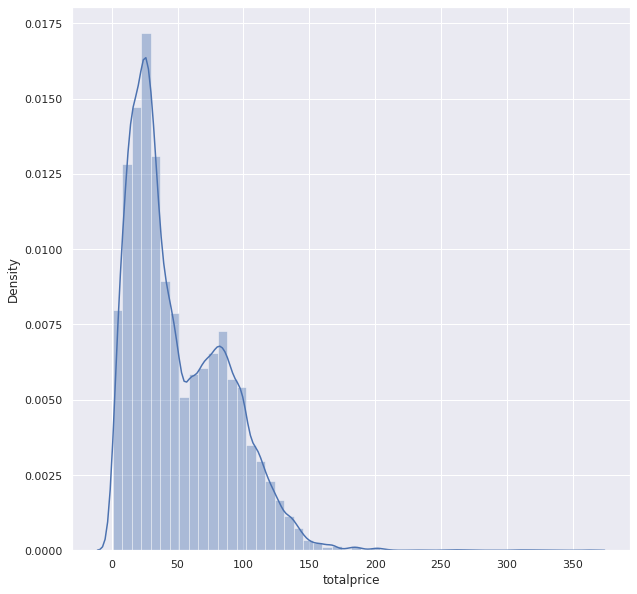

In [17]:
#have a look at the total price distribution
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df2['totalprice'], color='b')

#the price distribution is not normally distributed
#can conclude that the majority of prices has a value between 14 and 35 euros

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


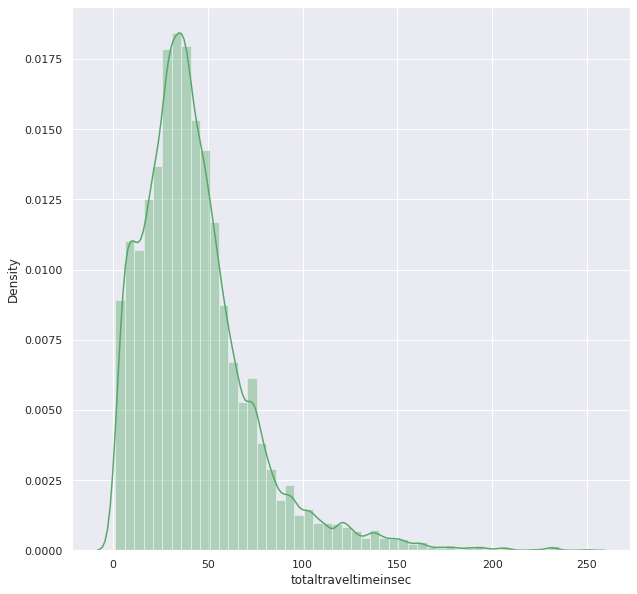

In [18]:
#have a look at the total travel time distribution
sns.set(color_codes=True) #change how matplotlib color shorthands are interpreted
plt.figure(figsize=(10,10)) #set the size
sns.distplot(df2['totaltraveltimeinsec'], color='g')

#exponential distribution
#can conclude that the dense area is 25-35 hours

In [20]:
# get sample from df2 that df2=df1
df2s= df2['totalprice'].sample(n=63000, random_state=1)
df2s

46932     83.21
74285     15.22
64944    114.75
25834     22.12
21381     61.94
          ...  
16329     23.37
25022    112.38
56564     26.75
65532    138.94
4215      32.92
Name: totalprice, Length: 63000, dtype: float64

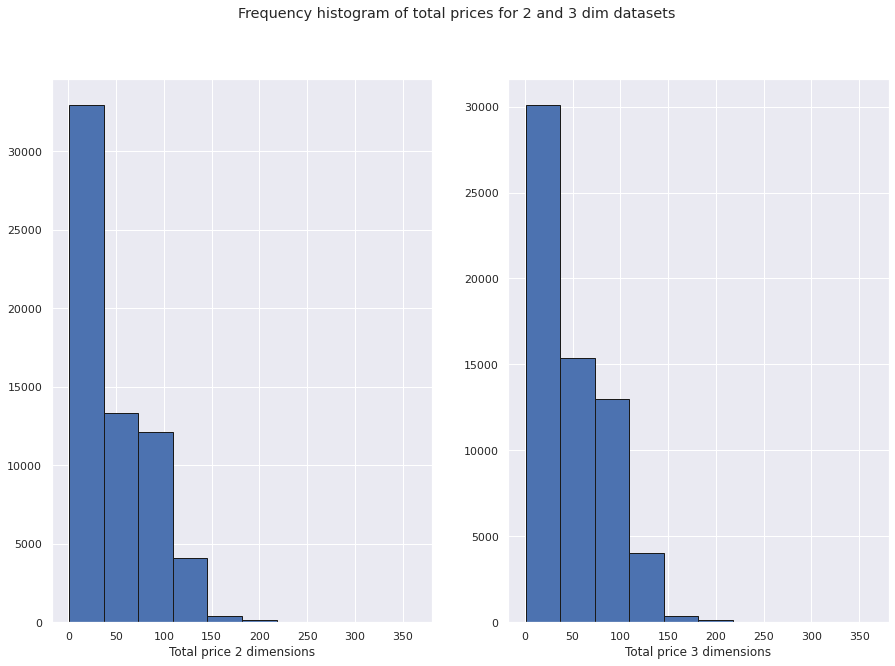

In [21]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,10))
fig.suptitle('Frequency histogram of total prices for 2 and 3 dim datasets')
ax1.hist(df1['totalprice'], bins=10, histtype='bar', ec='k') 
ax2.hist(df2['totalprice'].sample(n=63069, random_state=1), bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Total price 2 dimensions")
ax2.set_xlabel("Total price 3 dimensions")
plt.show()

In [22]:
import scipy.stats as stats
#As the p value obtained from the Shapiro-Wilk test is significant (p < 0.05)
# we sum up again that the data is not normally distributed
w, pvalue = stats.shapiro(df1['totalprice'].sample(n=200, random_state=1))
w, pvalue


(0.899763286113739, 2.427241740932118e-10)

In [23]:
w, pvalue = stats.shapiro(df2['totalprice'].sample(n=200, random_state=1))
w, pvalue


(0.9250867962837219, 1.3982589308625393e-08)

In [24]:
#significance level =0.05 ,indicates a 5% risk of concluding that a difference exists when there is no actual difference
#as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), we conclude that the total price of the data set 1 is not significantly greater than the total price from data set 2

stats.mannwhitneyu(x=df1['totalprice'], y=df2['totalprice'].sample(n=63069, random_state=1), alternative = 'greater')

MannwhitneyuResult(statistic=1884880760.5, pvalue=1.0)

In [28]:
#significance level =0.05 ,indicates a 5% risk of concluding that a difference exists when there is no actual difference
#as the p value obtained from the Mann-Whitney U test is not significant (p > 0.05), we conclude that the total travel time of the data set 1 is not significantly greater than the total travel time distribution from data set 2
# if sample size is too big, p value could not be exact enough
stats.mannwhitneyu(x=df1['totaltraveltimeinsec'], y=df2['totaltraveltimeinsec'].sample(n=63069, random_state=1), alternative = 'greater')

MannwhitneyuResult(statistic=1823528570.0, pvalue=1.0)

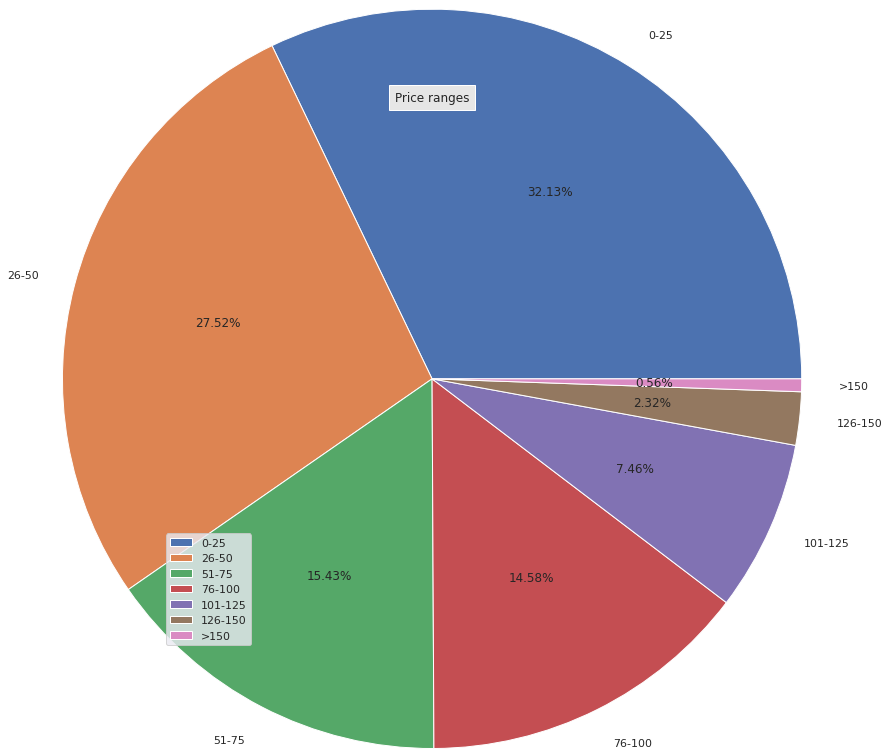

50.09193812266397

In [29]:
#briefly investigate other plots (differences for 3 dim) before the final merging

#price binning for 3 dim
data_price3 = df2[:] #slice for every element
data_price3["totalprice"] = data_price3["totalprice"].astype(int) #specify the column and dtype we need
bins = [0,25,50,75,100,125,150,200] #create a list of bins
labels = ['0-25','26-50','51-75','76-100','101-125', '126-150', '>150'] #create the list of labels
data_price3['totalprice_cat'] = pd.cut(data_price3["totalprice"], bins=bins, labels=labels) #bin values into discrete intervals
data_price3.head()
plt.figure(figsize=(10,10)) 

#count and enter percentages inside the shape
plt.pie(data_price3['totalprice_cat'].value_counts(), labels = labels, autopct = "%0.2f%%", radius = 1.7)#parametres
plt.legend(loc="lower left") #location of the figure
plt.title("Price ranges", bbox={'facecolor':'0.9', 'pad':6}, loc = "center")#play with the title
plt.show()


#in average the customer would have to wait in seconds
data_price3["totalprice"].mean()

#the most common range for price in dataset3 is also below 25 euros

Text(0.5, 1.0, 'Correlation between price and travel time')

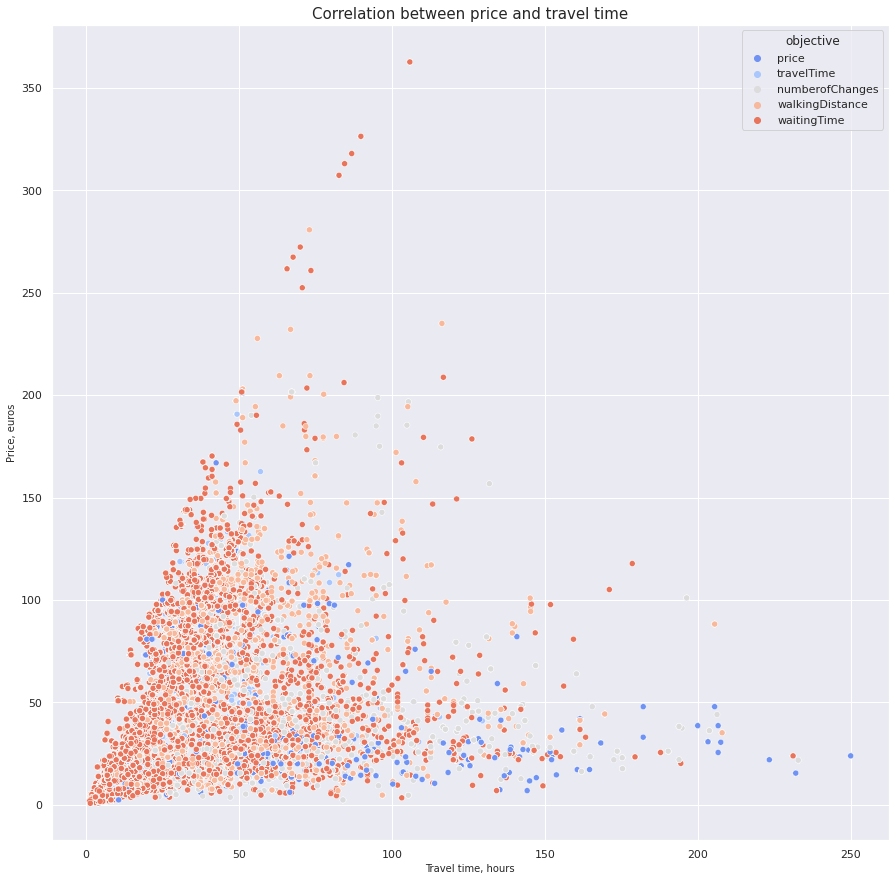

In [68]:
#absolutely the same pattern, final solutions are different (new unique combinations based on considered preferences)
#scatter plot price per travel time in general, hard to interpret , further checks per source, separate group of labels would be needed to reveal the combinations prices per times
import matplotlib as mpl
plt.figure(figsize=(15, 15))
sns.scatterplot(
    data=df3,
    x="totaltraveltimeinsec", y="totalprice",hue="objective",
     palette= "coolwarm",
)
plt.xlabel("Travel time, hours", size = 10)
plt.ylabel("Price, euros", size = 10)
plt.title("Correlation between price and travel time", size = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


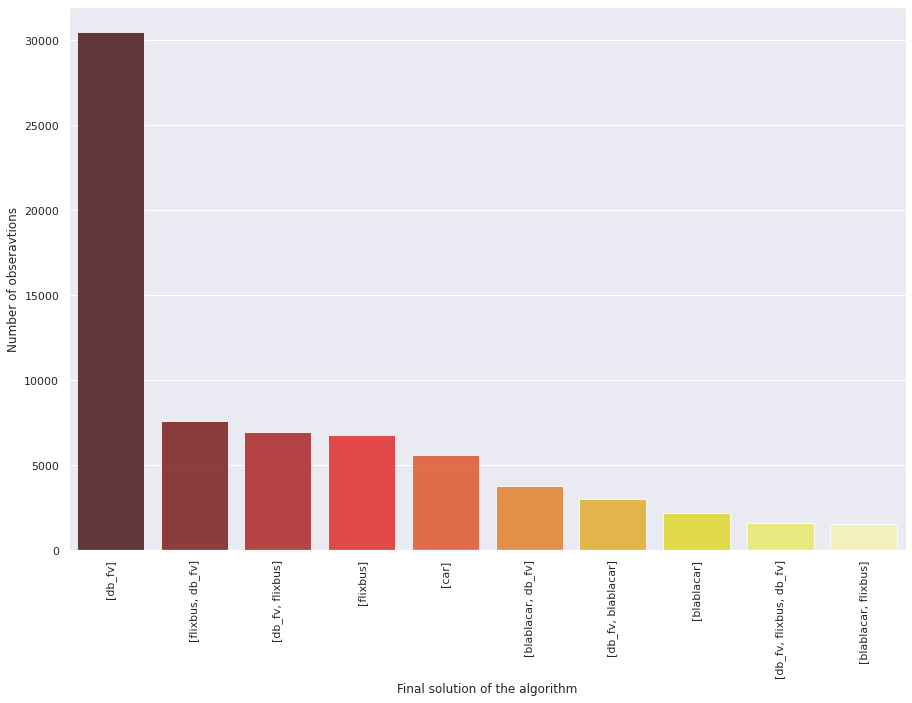

In [31]:
# Plot Top 10 combinations based on number of observations
# the lead combination is the same as in 2dim, the second one proposed option is different in comparison to 2dim dataset
# the most common one (suitable for many routes)- train
cnt_srs = df2['finalsolutionusedlabels'].value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, palette="hot")
plt.xticks(rotation='vertical')
plt.xlabel('Final solution of the algorithm', fontsize=12)
plt.ylabel('Number of obseravtions', fontsize=12)
plt.show()

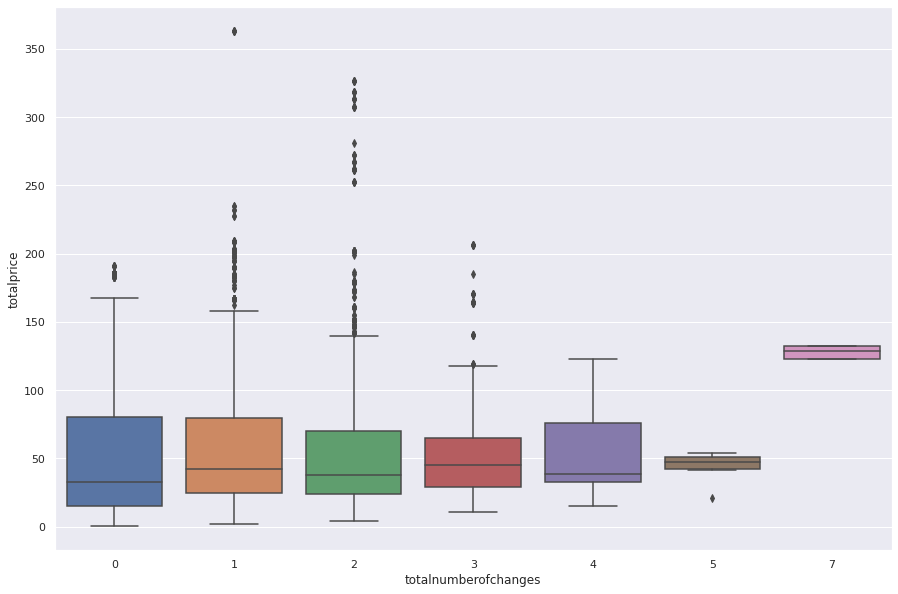

In [32]:
#number of transfers per price
#check the outliers with the dots
#price for 0 transfers (null or 0) is slightly greater than for 1 and 2 in general
#mostly distributed between 0 and 165 euros, the prices which are higher 165 we could consider them as the outliers
# 8 deffirenet options including 0 as null

plt.figure(figsize=(15,10))
sns.boxplot(x='totalnumberofchanges',y='totalprice',data=df2.sort_values('totalprice',ascending=False))

Text(0.5, 1.0, 'Distribution of prices per number of changes ')

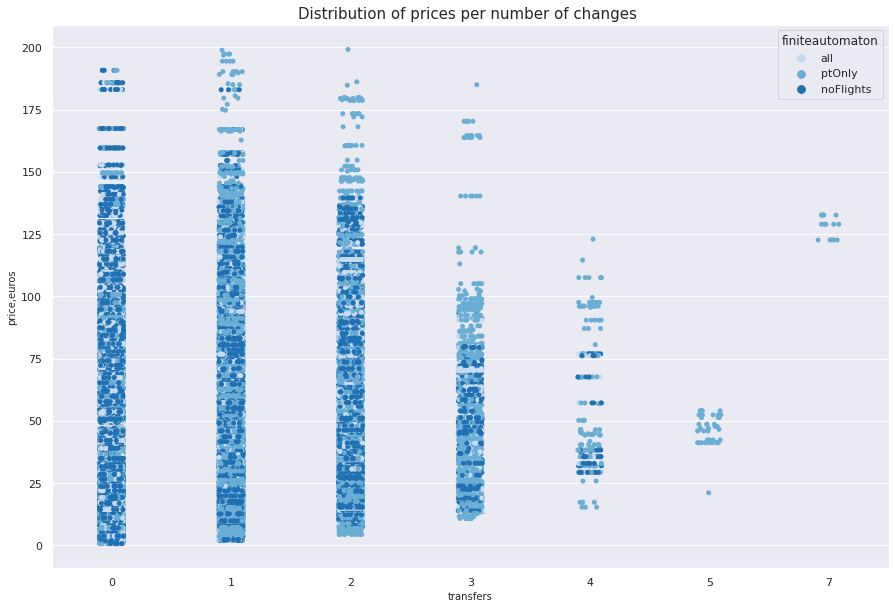

In [33]:
#investigate deeper in the transfer distribution when the price is less than 200 euros

plt.figure(figsize=(15, 10))
sns.stripplot(data=df2,x=df2.totalnumberofchanges[df2['totalprice']<200]#set an interval
              ,y='totalprice', hue="finiteautomaton",palette='Blues') #configure the axis
plt.xlabel("transfers", size = 10)
plt.ylabel("price,euros", size = 10)
plt.title('Distribution of prices per number of changes ',fontsize=15)

#found out that the price is slightly higher having 1 transfer than 0 (includes 0 and null),2 and 3, but all of them are higher than having  4,5 and 7
# for 0 transfer the mode of noFlights is dominative one, especially when the price is high, for 1-7 transfers higher price relates to public transport choice mostly

In [34]:
#get the combinations for 2 dim
uniqueValues = df1['finalsolutionusedlabels'].unique()
uniqueValues

array(['[flixbus]', '[db_fv]', '[car]', '[blablacar, db_fv]',
       '[flixbus, db_fv]', '[db_fv, flixbus]',
       '[db_fv, flixbus, blablacar]', '[db_fv, flixbus, db_fv]',
       '[db_fv, blablacar]', '[db_fv, blablacar, db_fv]',
       '[flixbus, blablacar, db_fv]', '[blablacar]',
       '[db_fv, blablacar, flixbus]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus]', '[blablacar, flixbus]',
       '[blablacar, db_fv, flixbus]', '[blablacar, flixbus, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, db_fv, flixbus, db_fv]', '[flixbus, flight, db_fv]',
       '[flixbus, blablacar]', '[flixbus, db_fv, flixbus]',
       '[flixbus, blablacar, flixbus]',
       '[flixbus, flight, db_fv, flixbus]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, flight, flixbus]',
       '[flixbus, blablacar, db_fv, flixbus]',
       '[flixbus, db_fv, blablacar]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[db_fv,

In [35]:
#for 3 dim
uniqueValues1 = df2['finalsolutionusedlabels'].unique()
uniqueValues1

array(['[db_fv]', '[blablacar]', '[car]', '[flixbus, db_fv]',
       '[db_fv, flixbus]', '[flixbus]', '[db_fv, blablacar]',
       '[flixbus, blablacar]', '[db_fv, flixbus, db_fv, flixbus]',
       '[db_fv, flixbus, db_fv]', '[blablacar, db_fv]',
       '[db_fv, blablacar, db_fv]', '[db_fv, blablacar, flixbus]',
       '[db_fv, blablacar, flixbus, db_fv]',
       '[blablacar, db_fv, flixbus, db_fv]',
       '[blablacar, flixbus, db_fv]', '[blablacar, flixbus]',
       '[blablacar, db_fv, flixbus]', '[flixbus, blablacar, flixbus]',
       '[flixbus, db_fv, flixbus]', '[flixbus, db_fv, blablacar]',
       '[db_fv, flixbus, blablacar]', '[flixbus, blablacar, db_fv]',
       '[flixbus, flight, db_fv]',
       '[db_fv, flixbus, db_fv, flixbus, db_fv]',
       '[flixbus, db_fv, flixbus, db_fv]',
       '[db_fv, blablacar, db_fv, flixbus]'], dtype=object)

In [36]:
# we have 6 additional combinations in 2 dim than in 3 dim
np.setdiff1d(uniqueValues,uniqueValues1)

array(['[db_fv, flight, flixbus, db_fv]',
       '[db_fv, flixbus, blablacar, flixbus]',
       '[flixbus, blablacar, db_fv, flixbus]',
       '[flixbus, blablacar, flixbus, db_fv]',
       '[flixbus, flight, db_fv, flixbus]', '[flixbus, flight, flixbus]'],
      dtype=object)

In [37]:
#we do not have any new unique solutions themselves in 3 dim versus 2 dim
np.setdiff1d(uniqueValues1,uniqueValues)

array([], dtype=object)

In [38]:
#combine 2 datasets
frames = [df1, df2]
df3 = pd.concat(frames)
df3

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


In [39]:
#no duplicates detected, combinations within thw rows are different for the itineraries
df3.drop_duplicates()
df3

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen
...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen


Text(0.5, 1.0, 'The top 20 most proposed labels versus mean price')

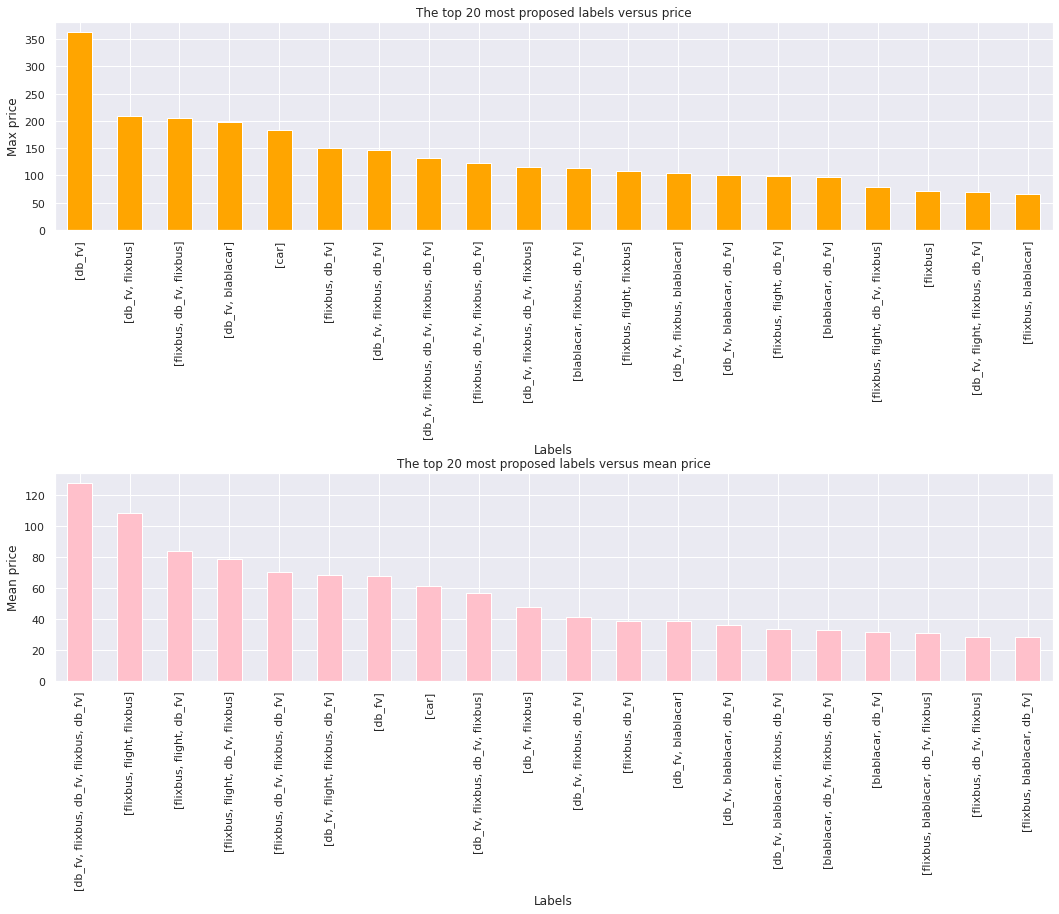

In [40]:
#display the top twenty labels by max price
most_popular_labels=df3.groupby("finalsolutionusedlabels")["totalprice"].agg("max").sort_values(ascending=False).head(20)
most_popular_labels

fig, axes = plt.subplots(2,1,figsize=(15,10))

#visually checked that the top 3 popular labels are train, train+bus, bus+train+bus
plt.subplot(211)
most_popular_labels.plot(kind='bar',color='orange')#set up inner parametres
plt.xlabel("Labels", size = 12)
plt.ylabel("Max price", size =12)
plt.title("The top 20 most proposed labels versus price", size = 12)

plt.tight_layout() #space
#the ranking of labels have changed when using mean price
#the top 3 became train+bus+train+bus+train, bus+flight+bus, bus+flight+train
plt.subplot(212)
mean_modes = df3.groupby("finalsolutionusedlabels")["totalprice"].agg("mean").sort_values(ascending=False).head(20) #group by aggregated mean in descending order
mean_modes.sort_values(ascending=False).plot(kind = "bar",color='pink') #sort the values in descending order
plt.xlabel("Labels", size = 12)
plt.ylabel("Mean price", size = 12)
plt.title("The top 20 most proposed labels versus mean price", size = 12)

In [ ]:
#check combinations via transport types
# will use it for clusters
#returns nothing now
def process_transport_types(df3):
  transport_types = ['blablacar', 'db_fv', 'flixbus', 'car', 'flight']
  for t in transport_types:
    # create new dataframe
    df = pd.DataFrame()
    for row in range(0, len(df3)):
      if t in df3['finalsolutionusedlabels']:
        df.append(row)
    
    return df

# plot prices per travel times
  plt.figure(figsize=(10, 10))
  sns.scatterplot(
      data=df3,
      x="totaltraveltimeinsec", y="totalprice", hue="finalsolutionusedlabels",
      palette= "inferno",
  )
  plt.xlabel("Travel time, hours", size = 10)
  plt.ylabel("Price, euros", size = 10)
  plt.title("Price per travel time for transport combination", size = 15)


process_transport_types(df3)

   


In [41]:
#separate the values which are the nulls and 0-s
def process_dataset(data):
  data['define_value_numberOfChanges'] = "null"
  data['define_value_walkingDistance'] = "null"
  data['define_value_waitingTime'] = "null"
  for i in range(0, len(data)):
    if "numberofChanges" in data['consideredpreferences'].values[i]:
      if data["totalnumberofchanges"].values[i] == 0:
        data["define_value_numberOfChanges"].values[i] = 0
      else:
        data["define_value_numberOfChanges"].values[i] = data["totalnumberofchanges"].values[i]
    else:
      data["define_value_numberOfChanges"].values[i] = None

    if "walkingDistance" in data['consideredpreferences'].values[i]:
      if data["totalwalkingdistance"].values[i] == 0:
        data["define_value_walkingDistance"].values[i] = 0
      else:
        data["define_value_walkingDistance"].values[i] = data["totalwalkingdistance"].values[i]
    else:
      data["define_value_walkingDistance"].values[i] = None

    if "waitingTime" in data['consideredpreferences'].values[i]:
      if data["totalwaitingtime"].values[i] == 0:
        data["define_value_waitingTime"].values[i] = 0
      else:
        data["define_value_waitingTime"].values[i] = data["totalwaitingtime"].values[i]
    else:
      data["define_value_waitingTime"].values[i] = None
      
  return data

datanew = process_dataset(df3)
datanew

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,None,None,None
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,None,None,None
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.5
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,3.04
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.67


In [42]:
# replace none
datanew.fillna(value='NULL', inplace=True)
datanew


,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.5
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,3.04
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.67


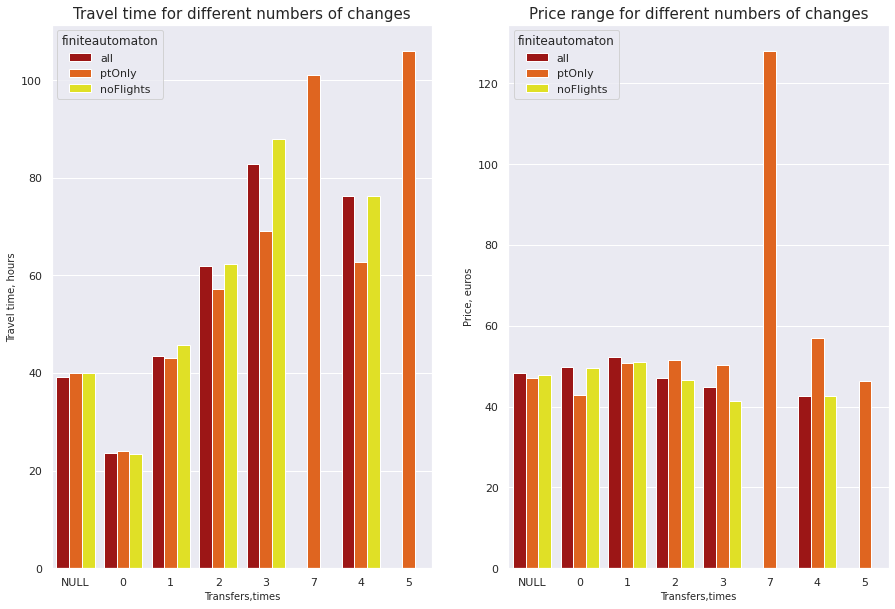

In [43]:
def plot_data(data):
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  #plot the differences within the tranfers with fixed values per mode type, 5 and 7 changes are relevant for public transport only-the time is the highest
  #direct transportation correspond equally to all mode types, normally happening within 1 day (<24 hours)
  plt.subplot(121)
  
  sns.barplot(x=data.define_value_numberOfChanges,y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="hot",data=datanew,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Transfers,times", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time, hours", size = 10)
  plt.title("Travel time for different numbers of changes", size = 15)

  plt.subplot(122)
  #the highest price again is for 7 changes
  sns.barplot(x=data.define_value_numberOfChanges,y=data.totalprice,hue="finiteautomaton",palette="hot",data=datanew,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Transfers,times", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price, euros", size = 10)
  plt.title("Price range for different numbers of changes", size = 15)

#considering the NULL value, we cant detect any outstanding result, there could be any number of transfers inckuded
#the price is not hogher in generetal when having 1 transfer


plot_data(datanew)

In [44]:
wd=datanew.copy()
wd

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.5
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,3.04
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.67


In [45]:
def reduce_null(data):
  data.drop(data.loc[data['define_value_walkingDistance']== 'NULL'].index, inplace=True)
  #data.drop(data.loc[data['define_value_waitingTime']== 'NULL'].index, inplace=True)

  return data

reduce_null(wd)


,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
40,3.93,0.86,0,0.300,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,NULL
41,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,NULL
42,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,NULL
43,3.93,0.86,0,0.300,0.00,travelTime,all,"[travelTime, price, numberofChanges, walkingDi...",[flixbus],Essen,Gelsenkirchen,0,0.3,NULL
44,2.53,3.83,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.5
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,3.04
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.67


In [46]:
wt=datanew.copy()
wt

,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
0,3.93,0.86,0,0.000,0.00,price,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
1,1.33,2.17,0,0.000,0.00,price,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
2,1.33,2.17,0,0.000,0.00,travelTime,all,"[travelTime, price]",[db_fv],Essen,Gelsenkirchen,NULL,NULL,NULL
3,3.93,0.86,0,0.000,0.00,travelTime,all,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
4,3.93,0.86,0,0.000,0.00,price,ptOnly,"[travelTime, price]",[flixbus],Essen,Gelsenkirchen,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.5
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,3.04
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.67


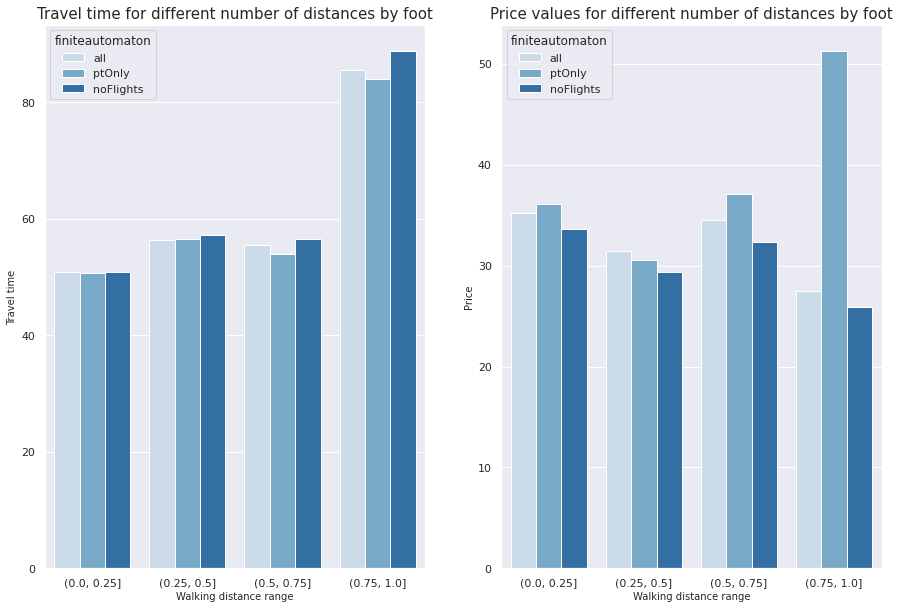

In [54]:
def plot_d(data):
  #the highest walking distance corresponds to the highest travel time, normally mode of noFlights increases travel time and walking distance
  #distance between 0,2-0,5 matches with the higher travel time than distance by foot from 0,5 to 0,7
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  
  plt.subplot(121)
  data['bin'] = pd.cut(data['define_value_walkingDistance'], bins = [0,0.25,0.5,0.75,1])
                       #range(0,1,0.5), labels=[f'{l}-{l+0.5}' for l in range(0,0.5,0.5)])
  sns.barplot(x=data['bin'],y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  #x=data.define_value_walkingDistance
  plt.xlabel("Walking distance range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time", size = 10)
  plt.title("Travel time for different number of distances by foot", size = 15)

#the highest price is for use of PT having the waling distance from 0,75 to 1, 
#other modes as all ad noflights within this range are lower in prices with the longest distance to overcome by foot
  plt.subplot(122)
  data['bin'] = pd.cut(data['define_value_walkingDistance'], bins = [0,0.25,0.5,0.75,1])
  sns.barplot(x=data['bin'],y=data.totalprice,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Walking distance range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price", size = 10)
  plt.title("Price values for different number of distances by foot", size = 15)


plot_d(wd)


In [50]:
#exclude null data to proceed with binning for the waiting time 
def reduce_nul(data):
  #data.drop(data.loc[data['define_value_walkingDistance']== 'NULL'].index, inplace=True)
  data.drop(data.loc[data['define_value_waitingTime']== 'NULL'].index, inplace=True)

  return data

reduce_nul(wt)


,totaltraveltimeinsec,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,objective,finiteautomaton,consideredpreferences,finalsolutionusedlabels,sourcename,targetname,define_value_numberOfChanges,define_value_walkingDistance,define_value_waitingTime
84,2.53,3.83,0,0.000,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,0
85,1.33,2.89,0,0.000,0.00,walkingDistance,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
86,2.53,3.83,0,0.000,0.00,waitingTime,all,"[travelTime, price, numberofChanges, walkingDi...",[car],Essen,Gelsenkirchen,0,0,0
87,1.33,2.89,0,0.000,0.00,waitingTime,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
88,1.33,2.17,0,0.000,0.00,numberofChanges,all,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Essen,Gelsenkirchen,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75176,36.67,103.63,1,0.000,0.50,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.5
75177,45.39,22.47,1,0.177,2.54,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,2.54
75178,45.89,21.85,1,0.177,3.04,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...","[blablacar, db_fv]",Würzburg,Oberhausen,1,0.177,3.04
75179,36.17,109.02,1,0.000,0.67,waitingTime,noFlights,"[travelTime, price, numberofChanges, walkingDi...",[db_fv],Würzburg,Oberhausen,1,0,0.67


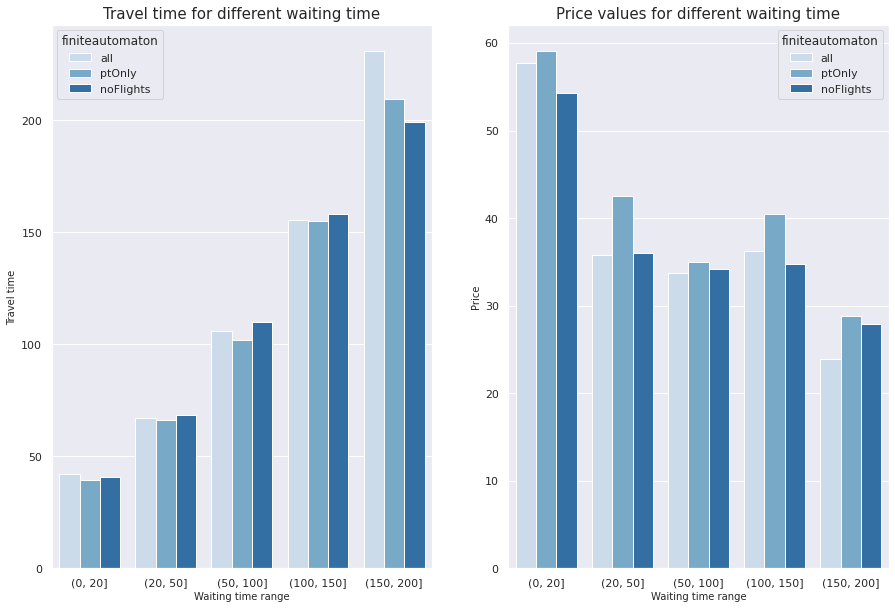

In [53]:
def plot(data):
  #the more waiting time we have- the more travel time would it be for the trip
  #all transport are the leads from the mode perspective
  fig, axes = plt.subplots(1, 2, figsize=(15, 10))
  #on average, price would be within the same ratio
  plt.subplot(121)
  data['bin'] = pd.cut(data['define_value_waitingTime'], bins = [0,20,50,100,150,200])
                       #range(0,1,0.5), labels=[f'{l}-{l+0.5}' for l in range(0,0.5,0.5)])
  sns.barplot(x=data['bin'],y=data.totaltraveltimeinsec,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  #x=data.define_value_walkingDistance
  plt.xlabel("Waiting time range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Travel time", size = 10)
  plt.title("Travel time for different waiting time", size = 15)

  #if we do not want to wait a lot-the price would be significantly higher
  #its easy to follow the pattern-more time to wait-less money to pay
  #especially with the public transport
  plt.subplot(122)
  data['bin'] = pd.cut(data['define_value_waitingTime'], bins = [0,20,50,100,150,200])
  sns.barplot(x=data['bin'],y=data.totalprice,hue="finiteautomaton",palette="Blues",data=data,ci=None)#size of confidence intervals to draw around estimated values-None
  plt.xlabel("Waiting time range", size = 10)
  plt.xticks(rotation=360)
  plt.ylabel("Price", size = 10)
  plt.title("Price values for different waiting time", size = 15)




plot(wt)

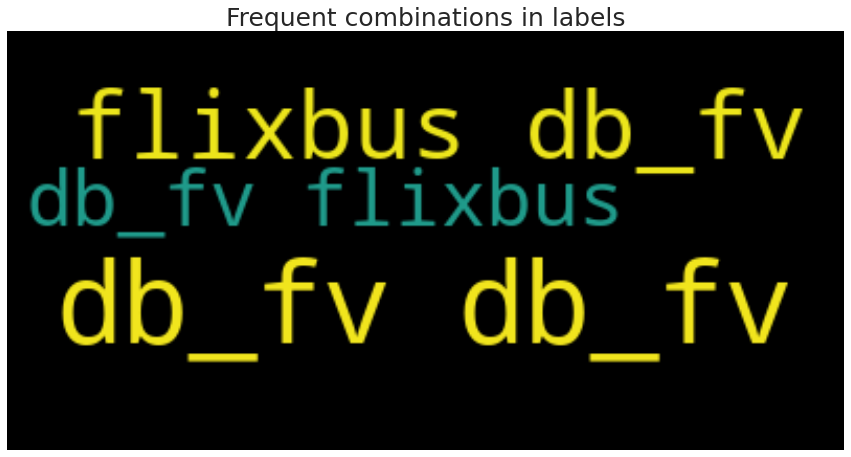

In [59]:
#for the sake of exploratory analysis have an idea to explore frequency of the proposed solutions
from wordcloud import WordCloud
#join each element of the column name in our dataset
txt =" ".join(str(each) for each in df3.finalsolutionusedlabels)
# create and generate a word cloud image, set a max range of words-top 2
name_wordcloud = WordCloud(max_words=3, background_color="black").generate(txt)
plt.figure(figsize=(15,10))
#display the generated image:
#nn bilinear interpolation, a linear interpolation is first performed between pixels in the horizontal (X) direction of the image and then in the Y direction (or vice-versa)
plt.imshow(name_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Frequent combinations in labels',size = 25) #set the figure size
plt.show()
#draw a conclusion about the frequency 
#as we can see, the most proposed mode of travel is land-based and includes flixbus or rail transportation

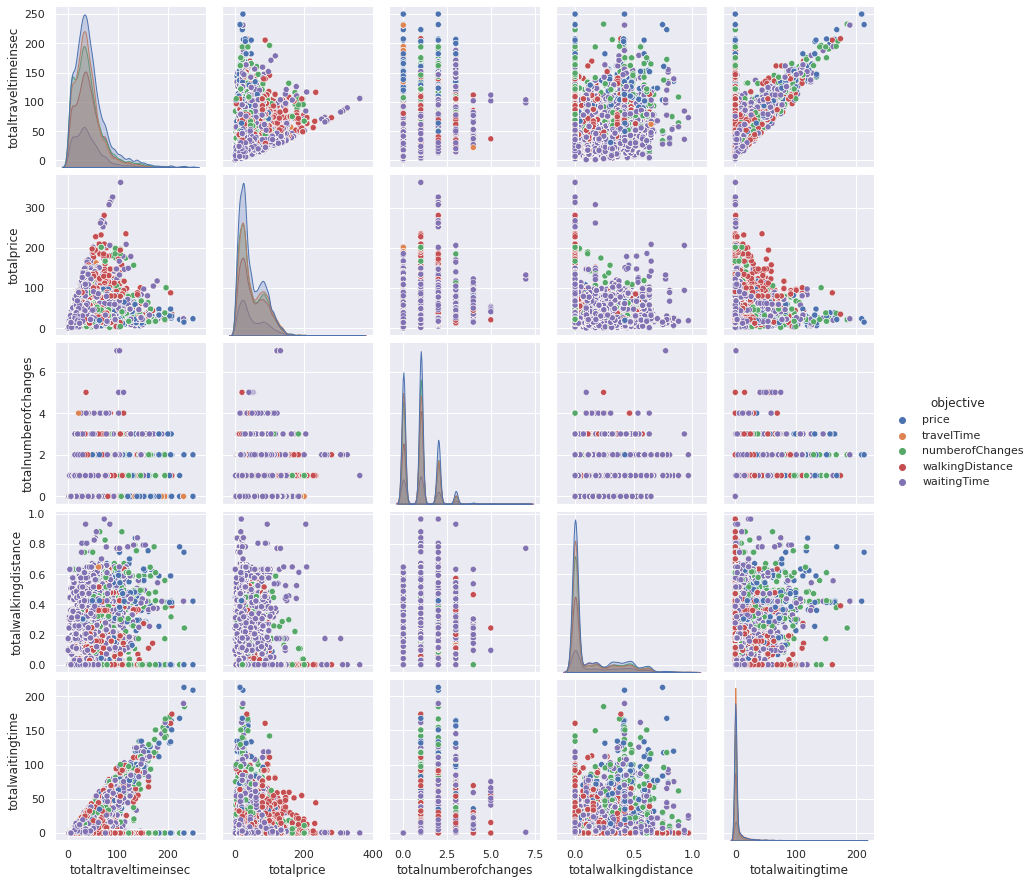

In [70]:
#get the pairplot to understand the a relationship between two variables 
#determine the color for different mode choices in general

df3 = df3.reset_index(drop=True)
sns.pairplot(df3,vars=['totaltraveltimeinsec','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime'],hue='objective')

# could highlight strong positive correlation between waiting and total time, could evaluate how our objective works

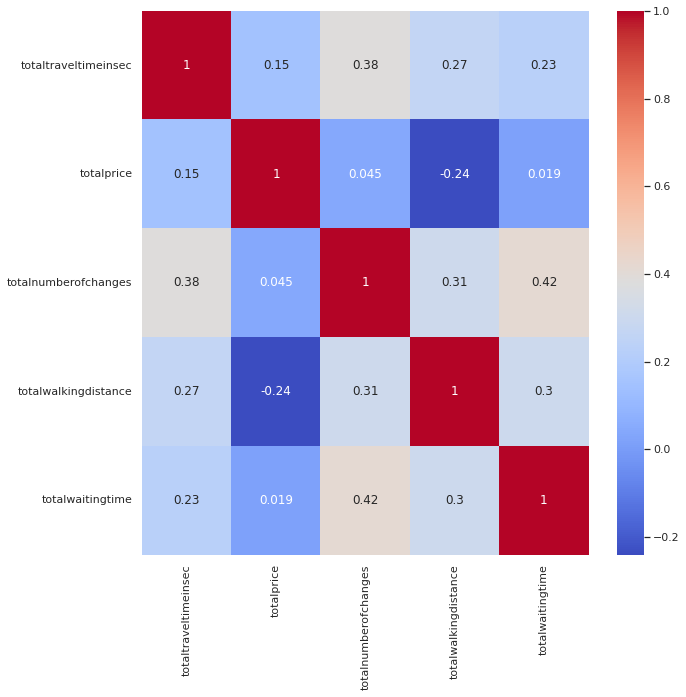

In [62]:
#build the correlation matrix for total price and other numerical columns to see how high the correlation would be

selected = df3[['totaltraveltimeinsec','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime']] #pick the columns
show=selected.corr(method='kendall') #compute pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(show,annot=True,cmap='coolwarm')

# reference:https://www.statisticssolutions.com/pearsons-correlation-coefficient/
# meaning of correlation number
# Perfect: If the value is near ± 1, then it said to be a perfect correlation
# High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
# Low degree: When the value lies below ± 0.29, then it is said to be a small correlation.
# No correlation: When the value is zero.

#conclusion for this part: strong moderate correlation for transfers and waiting time=> more changes more time to wait, travel time in total and transfers, low degree of correlation for price and travel time!!,
negative correlation (still small) between walking distance and price, if the price is higher-distance to cover by foot is lower